Imports

In [1]:
import sp
from astropy.io import ascii
import time
import ccdproc as ccdp
from astropy.nddata import CCDData
import numpy as np
import glob
import itertools
from astropy.table import Table
from astropy import table
import Logs
from astropy.convolution import convolve, Box1DKernel
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

Photometry

In [2]:
#read all files
science=ccdp.ImageFileCollection('Final_Science/median')
print(science.summary)

    file     simple ...                      flatcor                      bunit
------------ ------ ... ------------------------------------------------- -----
r1382286.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382287.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382288.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382289.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382290.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382291.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382292.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382293.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382294.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
r1382295.fit   True ... ccd=<CCDData>, flat=<CCDData>, norm_value=28676.5   adu
         ...    ... ...                 

In [3]:
#trackers used to save as csv
trackerf=[]
trackera=[]
start=time.time()
for imsd,imsn in science.data(return_fname=True):
    print('\nassessing',imsn)
    try:
        x,y,flux,sh,ro=sp.find(imsd,hmin=2000,fwhm=20,sharplim=([-2,2]),roundlim=([-2,2]))
        if len(x) == 2:
            for i in range(len(x)):
                trackerf.append([imsn,x[i],y[i],sh[i],ro[i]])
            flux,eflux,sky,skerr=sp.aper(imsd,x,y,phpadu=2.9,apr=[30],skyrad=[40,50],flux=True)
            trackera.append([imsn,flux[0][0],flux[1][0],sky[0],sky[1],eflux[0][0],eflux[1][0]])
            print(imsn,'flux calculated')
        elif len(x) != 2:
            print('skipping',imsn,'since it did not return exactly 2 star coordinates')
            exit()

    except Exception as e:
        print(imsn,'did not meet sharpness or roundness criteria')
        print(e)
        exit()
    


tf=np.reshape(trackerf,(-1,5))
ta=np.reshape(trackera,(-1,7))
print(time.time()-start)
foundf=Table(tf,names=('fname','x','y','sh','ro'),dtype=('str','float64','float64','float64','float64'))
fluxt=Table(ta,names=('fname','fluxcalib','fluxtarget','skycalib','skytarget','fluxerrcalib','fluxerrtarget')
            ,dtype=('str','float64','float64','float64','float64','float64','float64'))
ascii.write(foundf,'stars.csv',format='csv',overwrite=True)
ascii.write(fluxt,'fluxes.csv',format='csv',overwrite=True)


assessing r1382286.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
656.7437400313955 	 341.44622871574876 	 3757814.5208289823 +- 1312.1237521695373 	 3.476467247648724 +- 10.836094159887873
1049.7901565120706 	 1042.2002811852535 	 2593410.720972654 +- 1107.217062854589 	 3.893775994880613 +- 9.562555493698373
r1382286.fit flux calculated

assessing r1382287.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
657.9750340576511 	 340.03389926464155 	 3737965.969820429 +- 1280.554863301631 	 4.2569924560130765 +- 9.835697679652576
1051.049892789946 	 1040.8051862806687 	 2586215.5691034985 +- 1089.5469920376445 	 3.9827765554136256 +- 9.02352180627511
r1382287.fit flux calculated

assessing r1382288.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
658.2063228011516 	 339.7742125459746 	 3744248.8308381573 +- 12

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
660.9778767772342 	 339.6410687118273 	 3737817.4645181396 +- 1297.4722882924486 	 10.801988335996153 +- 10.429774351053144
1054.06411540699 	 1040.4636590385483 	 2571963.4373807255 +- 1088.3307362935227 	 10.403612172690917 +- 9.058070226917874
r1382303.fit flux calculated

assessing r1382304.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
660.9877678626377 	 339.79053860328963 	 2839706.0817850796 +- 1117.5560950938986 	 -0.19219900362779452 +- 8.623679734234994
1054.0040515049106 	 1040.5207932190208 	 1958420.448370789 +- 945.565779561251 	 -0.34986914690156967 +- 7.76667266830512
r1382304.fit flux calculated

assessing r1382305.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
662.2993146278282 	 338.36545712568426 	 3747530.452910904 +- 1284.1896557938549 	 

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
668.4810624841348 	 331.90268745943234 	 3741102.5020784945 +- 1294.5062869663311 	 13.238724138283558 +- 10.31252559237271
1061.465223543859 	 1032.623892073877 	 2577479.958979821 +- 1094.732145844958 	 12.133213254567757 +- 9.239980715618914
r1382320.fit flux calculated

assessing r1382321.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
669.4784376543869 	 332.38610468221464 	 3737325.538242668 +- 1293.1106641056876 	 13.041448605074265 +- 10.28161295039264
1062.411392084547 	 1033.111939678967 	 2571059.6224666066 +- 1099.48021415977 	 11.662294930455477 +- 9.426568025528429
r1382321.fit flux calculated

assessing r1382322.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
668.5350786481985 	 330.4494548801484 	 3727747.1813231013 +- 1288.3997871149122 	 13.7478

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
670.5550185755706 	 333.57869486353223 	 3705935.5909239273 +- 1290.5340226934088 	 11.975619703016962 +- 10.33733463231441
1063.508197683769 	 1034.3765845353007 	 2546006.1157611134 +- 1087.6821072887324 	 10.728628323132671 +- 9.172098497171422
r1382337.fit flux calculated

assessing r1382338.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
671.3168655753683 	 334.2781217913214 	 3721870.560578228 +- 1281.0823382627623 	 11.673988659410785 +- 9.931957744360538
1064.2451416495073 	 1034.8480319266957 	 2550885.1023378703 +- 1070.0880699907227 	 10.441773550874743 +- 8.555473341078402
r1382338.fit flux calculated

assessing r1382339.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
671.0378045701875 	 331.9230731333568 	 2853153.9639815115 +- 1120.1233262816068 	 0

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
673.3681157061166 	 333.94305858847866 	 3719103.1785057606 +- 1270.0884347083177 	 11.726188418312688 +- 9.548491741082493
1066.4052536820757 	 1034.7265937599639 	 2546856.01723442 +- 1076.831028349399 	 10.292921202503344 +- 8.80742146785329
r1382354.fit flux calculated

assessing r1382355.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
672.4638705970107 	 335.22787213626515 	 3759591.079107412 +- 1294.6406432423328 	 12.830184452335493 +- 10.231631468376113
1065.491030074424 	 1036.0739742176188 	 2577755.456738891 +- 1093.3817563686014 	 11.28456326535721 +- 9.194365238814413
r1382355.fit flux calculated

assessing r1382356.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
673.9531205335444 	 334.4469421838789 	 3749222.0551647306 +- 1301.3680973648554 	 12.92

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
674.5688156791243 	 334.70605487214914 	 3742511.335643544 +- 1291.06531871503 	 13.1050424026315 +- 10.186323948638211
1067.6294166188202 	 1035.293678285524 	 2557480.221034951 +- 1090.0558233022487 	 11.493386423095018 +- 9.190308380103014
r1382371.fit flux calculated

assessing r1382372.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
675.4755419868193 	 335.0107809419339 	 3727885.8058523987 +- 1261.1270839478314 	 12.906810826116427 +- 9.169759996824535
1068.4184100495788 	 1035.857036360012 	 2545577.4546549553 +- 1075.2133503162 	 11.334683382425297 +- 8.759701251383555
r1382372.fit flux calculated

assessing r1382373.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
676.1743987822165 	 335.1095998486194 	 3806798.256958555 +- 1290.1720290014093 	 14.2323960

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
677.9596320374327 	 335.42795582267195 	 3722156.190136532 +- 1259.0973281804409 	 10.58385626897641 +- 9.122434886777999
1070.9630265897488 	 1036.2631902843552 	 2548052.2752241106 +- 1069.979545844874 	 8.914567720008307 +- 8.567462966025815
r1382388.fit flux calculated

assessing r1382389.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
678.5804796946288 	 335.5428782725606 	 2823843.535924237 +- 1093.2297947138452 	 -0.8918940624207967 +- 7.813304169244723
1071.5125397116014 	 1036.2792126005736 	 1929790.0245529837 +- 929.335196576387 	 -1.6955581941390068 +- 7.3927606174812075
r1382389.fit flux calculated

assessing r1382390.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
677.8273750331482 	 334.9768639723503 	 3751260.0610456555 +- 1286.56603857778 	 7.769

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
680.615717285943 	 335.504771286409 	 3746257.2945083654 +- 1281.7956438202843 	 11.9357788395896 +- 9.840185188136063
1073.6442345170456 	 1036.2764684161198 	 2563687.222230921 +- 1083.0482466765425 	 10.797400839594804 +- 8.925968816359065
r1382405.fit flux calculated

assessing r1382406.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
680.3575769607105 	 333.483577604237 	 3724407.355282208 +- 1278.924738046821 	 11.648542401220414 +- 9.84274691070504
1073.3400839140074 	 1034.331933528103 	 2539573.0724559645 +- 1084.4250869867437 	 10.079001258835316 +- 9.098813731832259
r1382406.fit flux calculated

assessing r1382407.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
680.7121587372546 	 333.87023502865827 	 3771275.645639338 +- 1283.729944636245 	 12.34913655

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
681.9338386984066 	 337.446216328956 	 3707462.971011812 +- 1273.8143509644403 	 12.309248687912593 +- 9.741343312069255
1074.9052546795183 	 1038.2730394190394 	 2536180.9221108058 +- 1081.158071313217 	 10.603274208213879 +- 9.008896000107589
r1382422.fit flux calculated

assessing r1382423.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
684.0843464231292 	 338.6557978967077 	 3762983.4669944635 +- 1309.0994347175113 	 13.422895068750371 +- 10.71185098148039
1077.8866445585572 	 1039.4471945120297 	 2565862.4350111918 +- 1096.425487761133 	 11.864752297088792 +- 9.354400749902656
r1382423.fit flux calculated

assessing r1382424.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
683.2105539540773 	 336.95419374236275 	 3754700.9684754387 +- 1279.1835285231082 	 12.

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
686.1051632286355 	 343.0239962566518 	 3755842.1198219755 +- 1290.5603496827327 	 11.282173079043048 +- 10.106152653776693
1079.1679645920158 	 1043.7441349660244 	 2560621.6246553287 +- 1084.2721773561432 	 10.233652446155363 +- 8.983082505489739
r1382439.fit flux calculated

assessing r1382440.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
685.5155926972628 	 342.0148418279035 	 3733687.4001089125 +- 1275.0144294149818 	 11.457466823643315 +- 9.656284571895219
1078.7260339540678 	 1042.6364749558609 	 2549360.657058075 +- 1071.7551760232257 	 9.868084118065607 +- 8.621227800033969
r1382440.fit flux calculated

assessing r1382441.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
685.7700653624609 	 342.30854607933816 	 3740015.119757599 +- 1265.0137163573875 	 1

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
689.2308155422265 	 342.48394444781934 	 3746441.185129138 +- 1275.7663568826754 	 12.215567613523906 +- 9.620815289702206
1082.1895610289732 	 1043.2465067992946 	 2556555.92124842 +- 1079.9336762902208 	 10.696930224620388 +- 8.859654379611907
r1382456.fit flux calculated

assessing r1382457.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
688.3926607583652 	 343.0325710149343 	 3731827.130357229 +- 1263.8165241774745 	 11.941706498694284 +- 9.251059386434324
1081.4069453753461 	 1043.7941385519769 	 2550894.746964897 +- 1077.3196796092705 	 10.243090943222668 +- 8.802097364297012
r1382457.fit flux calculated

assessing r1382458.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
688.0872009132248 	 343.2925611349819 	 3744934.850082303 +- 1270.1295532718098 	 11.89

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
689.9174172637411 	 342.60489343398626 	 3751578.2049552216 +- 1269.2876174414075 	 12.86225549083229 +- 9.355501552326729
1082.791790900537 	 1043.2875372662086 	 2566920.7743941094 +- 1079.667893358728 	 11.571850823990111 +- 8.794871816860349
r1382473.fit flux calculated

assessing r1382474.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
690.7718892767535 	 341.0731410657991 	 3745939.060321752 +- 1275.3496665157224 	 12.948848047641071 +- 9.608055455797333
1083.8102656175097 	 1041.7444428540916 	 2544443.2989120865 +- 1076.433531382232 	 11.452944961101245 +- 8.807046667146611
r1382474.fit flux calculated

assessing r1382475.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
690.1348672635493 	 340.95321826597706 	 3744851.2441518493 +- 1273.1651373517689 	 13.

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
692.0041853026214 	 341.4587735257913 	 3746190.1522735963 +- 1263.2669991892108 	 7.607404697780545 +- 9.156070862357838
1084.985063017756 	 1042.1922277688118 	 2554184.9590482768 +- 1058.3222503767195 	 6.639455064494708 +- 8.122664494171298
r1382490.fit flux calculated

assessing r1382491.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
691.3924083806118 	 339.93495616879284 	 3742497.475400392 +- 1269.6957251589101 	 8.804952575192146 +- 9.41671182341083
1084.3826956093487 	 1040.5659163989264 	 2553382.118887574 +- 1071.3319923617646 	 7.399664607790922 +- 8.58447258740565
r1382491.fit flux calculated

assessing r1382492.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
691.9661851965353 	 340.6389954581346 	 3739770.3978713993 +- 1260.1438240559426 	 9.687810

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
694.4670395815051 	 341.11011115817723 	 3760030.9786128667 +- 1269.032183560548 	 12.27722177851105 +- 9.30284828069117
1087.4523185612404 	 1041.9427578531454 	 2565926.390343627 +- 1077.1364944182685 	 10.635512312164288 +- 8.714296079373694
r1382507.fit flux calculated

assessing r1382508.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
693.8957039186214 	 341.4131601630487 	 3730481.594580229 +- 1269.5671738311937 	 12.018532605041589 +- 9.47242728679694
1086.5982630829158 	 1042.0445432176202 	 2548622.955393169 +- 1071.5252025291709 	 10.55279229968123 +- 8.617412878457928
r1382508.fit flux calculated

assessing r1382509.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
693.6185575314065 	 341.7279482054406 	 3770597.5848153494 +- 1274.1776511858309 	 12.4245

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.1087785117652 	 360.0621241735888 	 3712776.415216866 +- 1272.7471922807026 	 3.1514278461697884 +- 9.676740041945278
1095.0538956632663 	 1060.5725555960094 	 2528773.845146063 +- 1067.7384431005503 	 2.0340574798457727 +- 8.597290420533458
r1382536.fit flux calculated

assessing r1382537.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.3827681045789 	 360.5042261974072 	 3704252.8084074166 +- 1244.9471335163983 	 3.732014547946015 +- 8.668996303046422
1095.368187773068 	 1061.1391604386151 	 2526116.8137895786 +- 1053.853075419638 	 2.438696380483888 +- 8.126719674222063
r1382537.fit flux calculated

assessing r1382538.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.465537594703 	 357.48814496706143 	 3750831.434040518 +- 1259.4640957510333 	 4.53782

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
701.843068150896 	 354.6333434081846 	 3736223.1964841452 +- 1246.4409896619445 	 5.024012505441304 +- 8.552078961982158
1094.903390958492 	 1055.246601972783 	 2551044.9899349227 +- 1055.5128763456871 	 3.558528887763489 +- 8.03982817453521
r1382553.fit flux calculated

assessing r1382554.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.1854095237338 	 356.0371619523339 	 3730810.7458449397 +- 1245.0394282538377 	 5.8133781751247 +- 8.525833943486715
1095.0190247369069 	 1056.5425462873272 	 2543654.836685297 +- 1051.0768930279564 	 4.287830771281023 +- 7.92243123227722
r1382554.fit flux calculated

assessing r1382555.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.7348528841308 	 354.8450489319719 	 3692290.5857355357 +- 1251.7687151636485 	 5.4736384812

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.6941127684922 	 350.71696858947064 	 3697808.474061133 +- 1240.8548032438607 	 6.7621924803490785 +- 8.541626110602717
1095.6550912379946 	 1051.3180877338953 	 2517023.4296690943 +- 1052.5007152137937 	 5.4023945577438175 +- 8.131588527358998
r1382571.fit flux calculated

assessing r1382572.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.9544413931844 	 351.39473969745484 	 2807220.258337402 +- 1080.6964733898074 	 -2.2687411494647343 +- 7.424000990630515
1095.790531744321 	 1051.9370420869511 	 1910469.633148026 +- 911.9862621403927 	 -3.3125823133453096 +- 6.905212041314233
r1382572.fit flux calculated

assessing r1382573.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
703.0695431096724 	 352.3243420884969 	 3709019.2903718124 +- 1240.3622811897155 	 7

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.6051438777553 	 349.069163687575 	 3736386.321529024 +- 1259.8711616686057 	 10.673206137868423 +- 9.077627862447553
1095.713720565844 	 1049.68186148638 	 2555224.2680092305 +- 1068.9447383928098 	 9.498051356540962 +- 8.491717601899188
r1382588.fit flux calculated

assessing r1382589.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.1693049290222 	 347.7670065867455 	 3692137.057673375 +- 1254.5877051621906 	 10.431654633855022 +- 9.107547112083044
1095.1774216368226 	 1048.283214990275 	 2515239.6775239566 +- 1055.2193945857373 	 9.030337892198173 +- 8.238462052454864
r1382589.fit flux calculated

assessing r1382590.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
702.0616166006179 	 348.4637237542065 	 3703758.7067666496 +- 1261.3602100148894 	 10.695186

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
701.2986854303219 	 345.6590582278036 	 3730329.4383982527 +- 1247.318998976312 	 3.2851424522349335 +- 8.619867097927072
1094.636278018095 	 1046.3642605234659 	 2550543.863285048 +- 1053.355138537238 	 1.456973886911428 +- 7.964411550553191
r1382605.fit flux calculated

assessing r1382606.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
701.1280424766721 	 346.2704539816845 	 3712061.524977254 +- 1238.420649396656 	 3.132659205296381 +- 8.363032067239182
1094.371025924222 	 1046.9772909618957 	 2531798.560365444 +- 1045.3385101518884 	 1.5313446924820413 +- 7.783009918814503
r1382606.fit flux calculated

assessing r1382607.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
700.6318276718513 	 343.75525971169503 	 3705429.6349916356 +- 1238.3290118624784 	 3.4472608

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
698.8752393042411 	 340.5856831336988 	 3714085.7511277488 +- 1247.8080714874168 	 5.505883279736199 +- 8.728284488883405
1091.8113948924647 	 1041.2864045673082 	 2535646.724723702 +- 1056.6401404962455 	 3.6758316564880165 +- 8.170637374475433
r1382622.fit flux calculated

assessing r1382623.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
699.4069152185139 	 340.93338543326377 	 3683500.438184713 +- 1240.7002084396972 	 5.041265956804214 +- 8.614751781816363
1092.269696022142 	 1041.4161644864198 	 2523554.335451142 +- 1044.846980960369 	 3.6314923096896132 +- 7.815100671682518
r1382623.fit flux calculated

assessing r1382624.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
699.3278288422446 	 341.8506067234692 	 3713030.11964199 +- 1254.0033875422798 	 5.058239

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
697.3518697427417 	 338.185845174868 	 3693517.3636056297 +- 1240.5988089947489 	 6.3447829135131535 +- 8.555244568846655
1090.3477705314951 	 1038.8545963168228 	 2517033.8419567975 +- 1054.3548370780813 	 4.627043976678625 +- 8.197487692837138
r1382639.fit flux calculated

assessing r1382640.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
696.3844577617322 	 338.9930076883301 	 3718873.5532635334 +- 1249.8206352443033 	 6.466003810546201 +- 8.781440039113335
1089.6177493021262 	 1039.6161293458688 	 2536844.1499657365 +- 1052.3424698872616 	 5.1272868666754 +- 8.009146306736023
r1382640.fit flux calculated

assessing r1382641.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
696.9273096479199 	 337.5784071505603 	 3712351.432533919 +- 1249.4619470529215 	 6.43477

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
694.3314140513762 	 335.3943044838894 	 3710002.8476093044 +- 1246.5355521180225 	 7.101149008167797 +- 8.70034327777369
1087.5691612056994 	 1036.1494419000894 	 2525819.8410635795 +- 1055.6872410287208 	 5.71474653617593 +- 8.193816884205285
r1382656.fit flux calculated

assessing r1382657.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
693.9867114211086 	 335.8275064972765 	 3729991.894261433 +- 1247.1079914626107 	 7.674836867468262 +- 8.613308188374678
1087.0898873793487 	 1036.375914018768 	 2549363.0572385928 +- 1060.4197506559983 	 5.9930444611450895 +- 8.225657425735129
r1382657.fit flux calculated

assessing r1382658.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
694.7506848007517 	 335.7246025764411 	 3703265.406437305 +- 1248.247653760066 	 7.4839802

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
691.4437228074597 	 331.3781492282703 	 3714092.0218317956 +- 1254.8398456627017 	 9.947591969374571 +- 9.001915627070645
1084.4270517159846 	 1032.016087694332 	 2541984.1043435214 +- 1065.6476030546526 	 8.436487353151213 +- 8.451482717196397
r1382674.fit flux calculated

assessing r1382675.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
691.9829544208862 	 331.8188067299158 	 3737619.387466848 +- 1258.1375117125597 	 10.207286868239109 +- 9.004581110943128
1085.278052572914 	 1032.4312428740777 	 2563899.5889288103 +- 1067.9667175981501 	 8.850479612203063 +- 8.408817767953519
r1382675.fit flux calculated

assessing r1382676.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
691.9196667021689 	 331.83797132682605 	 3695920.601027824 +- 1254.410577876967 	 10.1149

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
689.5422243505351 	 326.6783174371272 	 3697613.430107333 +- 1251.02312188517 	 13.072501838961209 +- 8.942268433083983
1082.654098172797 	 1027.2469009562133 	 2538616.5622883304 +- 1066.7038310597306 	 11.981182388573497 +- 8.506980742316138
r1382691.fit flux calculated

assessing r1382692.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
689.8296396909042 	 326.5024704207271 	 3684228.016877531 +- 1251.205147977089 	 12.769399110502022 +- 9.020109505825873
1082.8689437925689 	 1027.0945397997905 	 2521265.1294914037 +- 1064.0698463184085 	 11.637668015959989 +- 8.512988063195172
r1382692.fit flux calculated

assessing r1382693.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
688.7304575003142 	 327.45450771017596 	 3708001.3214698597 +- 1243.7859585401873 	 3.088

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
686.2997138240502 	 323.4241039587654 	 3690360.4960733037 +- 1236.1081205075402 	 4.497699345172009 +- 8.39200592698699
1079.2787225700215 	 1024.0822916711318 	 2527820.089371873 +- 1045.2769427094495 	 3.0737215244704643 +- 7.804999080237606
r1382708.fit flux calculated

assessing r1382709.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
687.0501280951117 	 321.908745293224 	 3684772.864480101 +- 1243.5121044083894 	 4.821237017638767 +- 8.718885780351089
1079.7939144614802 	 1022.5210704901581 	 2530397.121654749 +- 1054.0190495034228 	 3.2671018458447207 +- 8.107593985690967
r1382709.fit flux calculated

assessing r1382710.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
686.9330875869954 	 322.0245885955081 	 3684846.4139916804 +- 1238.4803218944257 	 5.35798

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
685.1919773286958 	 315.396486509306 	 3708498.8708878253 +- 1240.249816217408 	 6.468095157213053 +- 8.457488612307769
1078.2222525582865 	 1016.1321860578689 	 2550983.2559738224 +- 1052.1082295462027 	 4.579821220299758 +- 7.916200028173071
r1382725.fit flux calculated

assessing r1382726.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
684.8452782855101 	 315.27085702377366 	 3698493.427758912 +- 1242.6987506326582 	 6.388150275638376 +- 8.611441472659033
1077.8797460107942 	 1016.0191204329815 	 2545377.093767798 +- 1051.5509310088391 	 4.423442579812725 +- 7.929438100301058
r1382726.fit flux calculated

assessing r1382727.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
684.7943033945328 	 315.48413991738937 	 2764948.4760492234 +- 1073.5915996146232 	 -2.930

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
682.1009799048824 	 307.4627541801274 	 3676551.5702271014 +- 1242.8878598905987 	 6.883038374184711 +- 8.739145529986523
1075.4460531948328 	 1008.1517759354824 	 2538895.025898872 +- 1053.487876486673 	 5.503498529665013 +- 8.038437706865563
r1382742.fit flux calculated

assessing r1382743.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
683.269856174545 	 306.78530647206657 	 3694467.6098133097 +- 1247.5329142053106 	 7.3719712390589045 +- 8.823766074845855
1076.0869272096074 	 1007.4431992434013 	 2545876.9087541187 +- 1053.1618820383317 	 5.7680377332560155 +- 7.985193839973524
r1382743.fit flux calculated

assessing r1382744.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
682.484228792565 	 308.7910120520368 	 3716921.417466334 +- 1252.3206350070352 	 7.6336

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
679.3875880505725 	 304.85821464545376 	 3690826.660570061 +- 1251.6534709803266 	 8.320733363019569 +- 9.00246557737006
1072.4362067019313 	 1005.4046199455785 	 2547082.9648921345 +- 1061.457947697156 	 6.655543717943299 +- 8.27560342858203
r1382759.fit flux calculated

assessing r1382760.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
679.8441520959204 	 303.4758312005868 	 3697982.6125562345 +- 1246.6360463135884 	 8.079657611477803 +- 8.769714227658845
1072.8219251446708 	 1004.205869539662 	 2556520.9195245104 +- 1063.8142211604911 	 6.424353725663877 +- 8.304758827968936
r1382760.fit flux calculated

assessing r1382761.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
680.4090709971651 	 300.39091553712643 	 3683147.4582753587 +- 1245.5909040705658 	 8.01480

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
676.351609043894 	 297.88680688587897 	 3687429.88694732 +- 1244.2412120083811 	 9.355714059080068 +- 8.733067172148044
1069.467593315131 	 998.6163784947613 	 2544179.652719513 +- 1063.6683020271007 	 7.295163988830318 +- 8.369992836939863
r1382776.fit flux calculated

assessing r1382777.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
675.8890656017389 	 298.60640107038785 	 3721107.1337326523 +- 1248.2812754751194 	 9.441309061030502 +- 8.708677036395526
1069.2078347648744 	 999.1945632539165 	 2577772.3833967843 +- 1064.8883718947038 	 8.110613619951469 +- 8.22064268479456
r1382777.fit flux calculated

assessing r1382778.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
675.9098347195583 	 298.3171188922708 	 3700150.235440567 +- 1246.9698225241298 	 9.521741423

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
671.6358512960519 	 291.02725146648197 	 3678406.88344963 +- 1241.5168034184949 	 10.701542272697582 +- 8.675084807197775
1065.0299276882824 	 991.8934177736423 	 2541221.41217997 +- 1053.0980981268303 	 9.083042011099852 +- 8.01054953661253
r1382794.fit flux calculated

assessing r1382795.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
670.9385977000233 	 291.53469919153315 	 3676226.0655594114 +- 1244.661675056634 	 10.35059199148936 +- 8.810233401615058
1064.1732520737182 	 992.2602002991405 	 2538565.6107154503 +- 1053.9847869485557 	 8.778166591555397 +- 8.058321216377323
r1382795.fit flux calculated

assessing r1382796.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
670.9860965641701 	 292.84345349403935 	 3676798.687851788 +- 1243.534609911793 	 10.4625437

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
667.6596163043243 	 287.2860010627192 	 3711587.294002872 +- 1255.6946326087163 	 12.930839186735248 +- 9.047889850080475
1060.8682481960498 	 987.9289298151982 	 2548864.746918114 +- 1066.2445114128875 	 12.005133018563317 +- 8.433519033057543
r1382812.fit flux calculated

assessing r1382813.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
667.0443858958869 	 287.95824496287014 	 3722951.7232779805 +- 1251.9452609135967 	 13.69794584691771 +- 8.84259529365192
1060.1569775965277 	 988.6087916735177 	 2576776.9858298446 +- 1065.346442545282 	 12.021522435403973 +- 8.242733231077654
r1382813.fit flux calculated

assessing r1382814.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
667.0135846336767 	 288.43027964466035 	 3685111.0111796404 +- 1251.7311592455044 	 13.31

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
661.4691190304992 	 282.84603993165535 	 3661646.7358196275 +- 1219.951429650403 	 3.182796965423675 +- 7.887629076311811
1054.4730296084545 	 983.5269183764866 	 2547786.6941682086 +- 1040.9037235062463 	 1.6227449480413847 +- 7.516926864222516
r1382829.fit flux calculated

assessing r1382830.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
661.0253337828854 	 282.05222316460583 	 3645581.9926811936 +- 1222.141256995791 	 2.9322176218813762 +- 8.075676046195152
1054.238712943674 	 982.7368681649115 	 2524374.9628612692 +- 1034.7602359516193 	 1.1546287926243268 +- 7.430622493491915
r1382830.fit flux calculated

assessing r1382831.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
661.5938663283481 	 281.971991367008 	 3685423.7667439133 +- 1227.6842787236155 	 3.421

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
657.0448482018783 	 275.32863764802113 	 3658130.303288747 +- 1234.4773348194337 	 4.4974874578898 +- 8.507596625413434
1050.1758064338528 	 976.1739305343567 	 2541322.8038858715 +- 1052.2864115298285 	 2.5636814913884756 +- 7.980481383731534
r1382846.fit flux calculated

assessing r1382847.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
656.7793036272602 	 275.24783486613734 	 3656384.7922711214 +- 1229.0955807692212 	 4.812201219658055 +- 8.299974048525145
1049.7193199974972 	 975.7015846746231 	 2544100.3562340145 +- 1048.4584729721425 	 2.971944274205395 +- 7.823477410428045
r1382847.fit flux calculated

assessing r1382848.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
656.8909419904757 	 275.2465421377836 	 3053778.1332014217 +- 1133.102520866073 	 -1.1506

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
651.6850428247042 	 270.80837451069146 	 3678694.2090834198 +- 1246.5513390998067 	 5.8598727268097335 +- 8.87037304373164
1044.8322920938683 	 971.4152234504115 	 2544487.49375473 +- 1055.7923716897524 	 4.515461371269285 +- 8.088572079569282
r1382863.fit flux calculated

assessing r1382864.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
651.1263840169321 	 270.79130234012075 	 3638907.5214909436 +- 1233.7408709335068 	 5.667508236477418 +- 8.585198343313172
1044.5040306587234 	 971.6766289695256 	 2523461.0739041828 +- 1044.03019204127 	 4.238248470770532 +- 7.785514768337
r1382864.fit flux calculated

assessing r1382865.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
651.702866357087 	 267.51066906545293 	 3666624.3379920213 +- 1233.92037185623 	 5.84223507075

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
645.1160044446036 	 259.9590361621506 	 3655679.2972562225 +- 1236.6428652895038 	 5.716075376490269 +- 8.607420449830906
1038.497664058279 	 960.7772464566692 	 2529085.8816348007 +- 1047.680812131476 	 4.562402558437587 +- 7.88573806339176
r1382881.fit flux calculated

assessing r1382882.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
644.4340537870905 	 261.43749767207976 	 3680277.133006685 +- 1235.4329160671282 	 2.917741222318062 +- 8.421658218074027
1037.5693328011348 	 962.1772217826766 	 2543558.053069303 +- 1054.3870744865858 	 2.0693864835826634 +- 8.04336609925937
r1382882.fit flux calculated

assessing r1382883.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
644.2168376706903 	 258.08405685770583 	 3652732.5240062308 +- 1224.4577443298158 	 2.9567299

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
639.407281024155 	 251.42635108386492 	 3621307.196784567 +- 1224.5682164349173 	 6.781741769899485 +- 8.316353174290285
1032.4342221793083 	 952.1922480555461 	 2499656.4295140845 +- 1044.4822463317878 	 5.494374040169518 +- 7.945929643434433
r1382899.fit flux calculated

assessing r1382900.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
638.6487970788254 	 249.67349983574724 	 2806877.563449392 +- 1080.1054285369771 	 -2.06022677387912 +- 7.402448413467929
1031.7797443966556 	 950.2904178193047 	 1927276.495102398 +- 914.5203622397918 	 -2.6265534336808947 +- 6.881875524463326
r1382900.fit flux calculated

assessing r1382901.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
638.379137858967 	 249.44390901020972 	 3612835.3883702066 +- 1229.027687386249 	 6.558017

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
632.4472251015553 	 241.2268313618653 	 3660912.5303928843 +- 1240.249076041946 	 7.484344084510173 +- 8.720832263848191
1025.5765551024313 	 942.0501616652618 	 2514688.679561332 +- 1054.5510434109115 	 6.087132818866486 +- 8.218020448761697
r1382917.fit flux calculated

assessing r1382918.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
632.0900812455907 	 241.30039790590547 	 3672212.275418847 +- 1237.5344815396338 	 7.761453929443026 +- 8.551259761758683
1025.1074903804506 	 942.125069609946 	 2527366.5813275883 +- 1050.8313341719888 	 6.585549054600827 +- 8.01069438113809
r1382918.fit flux calculated

assessing r1382919.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
631.6799918989143 	 241.51797887144997 	 2907841.9877293543 +- 1100.7974593989804 	 -0.292529

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
428.28684375946733 	 285.74038091704404 	 3784563.7308170353 +- 1412.3670442168961 	 -50.49494152888974 +- 13.790579482742533
821.6316793518988 	 986.7737667206646 	 2605087.900985119 +- 1178.9710071998331 	 -49.697565471340866 +- 11.64311582373888
r1383574.fit flux calculated

assessing r1383575.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
429.27286932853457 	 284.16651035265056 	 3435751.7836767873 +- 1640.1008133522885 	 -52.426389979442106 +- 20.371799686208476
823.0066499197956 	 985.1851519659956 	 2376569.653474847 +- 1310.535523903726 	 -51.08671654600836 +- 15.735163749406672
r1383575.fit flux calculated

assessing r1383576.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
428.0183044986196 	 284.16496579997073 	 3520644.2965601343 +- 1430.3801404175176

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
430.2250473545713 	 272.8640646846554 	 3505900.429521716 +- 1606.442181794139 	 -48.399204514476416 +- 19.447666547889714
823.2420275110276 	 973.9385383727013 	 2427742.4881477323 +- 1314.1158835794508 	 -48.64201536429901 +- 15.662728815487434
r1383591.fit flux calculated

assessing r1383592.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
430.2353026609458 	 273.97252434230313 	 3509807.9425742496 +- 1541.1792856097277 	 -47.44541602965187 +- 17.922083557765582
824.0309715971538 	 975.184130075824 	 2415929.813223402 +- 1240.541159891849 	 -47.460032370221356 +- 13.950641281550931
r1383592.fit flux calculated

assessing r1383593.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
430.25181174339036 	 272.3235782363038 	 3447611.1574821714 +- 1606.9333028366364 	 -

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
434.1802227642164 	 255.10347553690707 	 3515434.694414709 +- 1471.985370211517 	 -47.77146559444161 +- 16.222841014873893
827.5778178462393 	 956.36170763017 	 2424085.9808819564 +- 1211.4405240606627 	 -48.37385951869645 +- 13.19739254802387
r1383608.fit flux calculated

assessing r1383609.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
433.9759778714275 	 255.12135026551096 	 3531184.419238179 +- 1553.8553662095878 	 -47.640560282155676 +- 18.16551626562324
827.8122255877217 	 956.1466999468634 	 2427632.5448191646 +- 1267.885838303974 	 -48.20103033206763 +- 14.57463377329936
r1383609.fit flux calculated

assessing r1383610.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
431.39383317419407 	 256.10275729874934 	 3482206.470597818 +- 1486.7084048315328 	 -47.0

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
434.3110655102803 	 252.7904678326645 	 5196825.874978226 +- 1755.2334322905094 	 -41.04380705005167 +- 18.85092503558505
828.0881097094566 	 953.9089720169684 	 3583829.036607665 +- 1464.4567976551928 	 -42.671764638438646 +- 15.829798786125494
r1383625.fit flux calculated

assessing r1383626.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
433.87183350747137 	 253.33810834913334 	 5214648.062938827 +- 1835.232057284379 	 -41.92138872268379 +- 20.805252467439907
826.9916603673654 	 954.4052753442087 	 3603002.9266770314 +- 1524.6512806512592 	 -42.83009308253976 +- 17.273366971270466
r1383626.fit flux calculated

assessing r1383627.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
434.1635573723694 	 252.95048909887572 	 5199204.453374817 +- 1851.3074803685129 	 -4

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
436.05131722739736 	 249.16040825556593 	 5271541.150285068 +- 1731.6533791074223 	 -40.00587376594268 +- 18.043941272770915
829.647412449212 	 950.4549656244643 	 3619938.537653662 +- 1446.1787762969623 	 -42.32566820236722 +- 15.247324992427005
r1383642.fit flux calculated

assessing r1383643.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
436.8387935018668 	 248.15696421824356 	 5229820.208580595 +- 1835.4258066809198 	 -42.00445111924238 +- 20.77527653963765
830.1742100304331 	 949.3252820151818 	 3596442.320495067 +- 1486.1489376979582 	 -42.63088769909897 +- 16.341075253914937
r1383643.fit flux calculated

assessing r1383644.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
436.6452775748425 	 248.90194091962394 	 5221455.091978338 +- 1858.9524598637147 	 -42

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
435.5114953273978 	 244.21466935559414 	 5246523.377527995 +- 1826.7855911513343 	 -42.4221489246266 +- 20.525585090065377
829.140355116885 	 945.3984027391751 	 3611268.911245963 +- 1491.7435510175483 	 -43.59636349288513 +- 16.43820625739222
r1383659.fit flux calculated

assessing r1383660.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
437.78693938265275 	 242.5812678125675 	 4421262.483530948 +- 1564.6970401077654 	 -44.596789867890635 +- 15.958800031748352
831.2120926188684 	 943.9794650809063 	 3045228.953935824 +- 1293.343104480452 	 -45.664209840831006 +- 13.10263112078895
r1383660.fit flux calculated

assessing r1383661.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
437.5718654221133 	 243.3284302140206 	 5291757.6330697965 +- 1785.5758723610522 	 -41.1

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
438.05621317008234 	 238.1197907524464 	 5296556.538802584 +- 1741.6138771090032 	 -42.602554872260036 +- 18.24127499714539
831.861154769299 	 939.3150387715197 	 3640574.787575666 +- 1427.9078959261944 	 -43.758501365509716 +- 14.698309140232853
r1383676.fit flux calculated

assessing r1383677.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
437.9200883012752 	 237.97678651087895 	 5304549.79517376 +- 1679.8842240109861 	 -41.14321446264027 +- 16.545391055248896
831.6054606565369 	 939.3710982075303 	 3647386.3258791943 +- 1416.6283304902802 	 -43.12720281079589 +- 14.371714412516123
r1383677.fit flux calculated

assessing r1383678.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
438.5695797507267 	 238.33898124819004 	 5274743.065138914 +- 1801.0626982549807 	 -4

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
439.0717242397124 	 234.8545966258072 	 5298356.618861384 +- 1782.7805790679681 	 -39.39330507053504 +- 19.302241072468657
832.8078128956222 	 936.3688093261424 	 3634497.476159089 +- 1446.5500495277372 	 -40.84828965648095 +- 15.211602089730203
r1383693.fit flux calculated

assessing r1383694.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
439.25811863398076 	 233.96641401220094 	 5322271.357258814 +- 1754.4671821517982 	 -40.10792814423558 +- 18.51186250534298
832.818819445182 	 935.1898246380279 	 3654821.0857013264 +- 1420.039767141809 	 -41.435384170919484 +- 14.439788114699466
r1383694.fit flux calculated

assessing r1383695.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
438.85419598101913 	 234.44801034966736 	 5304516.287959135 +- 1713.5834544962033 	 -4

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
439.9781159459572 	 227.70202287316525 	 5350847.107514793 +- 1635.3416560934377 	 -39.77785888936317 +- 15.120616559827372
833.4518699995477 	 928.9436216491129 	 3682566.0639436343 +- 1361.624715651407 	 -41.35203371946564 +- 12.691241469386094
r1383710.fit flux calculated

assessing r1383711.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
441.3502402223394 	 229.37626449206408 	 5300446.143292495 +- 1692.3450703340934 	 -39.47427184621729 +- 16.90343442477374
834.8772425354564 	 930.5443051253791 	 3647157.104961894 +- 1398.833250812596 	 -41.2782726003526 +- 13.883588657751401
r1383711.fit flux calculated

assessing r1383712.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
439.87636893946865 	 227.9838231377037 	 5364950.707355971 +- 1632.889321043412 	 -39.73

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
564.2907774386017 	 261.64737017269044 	 5389322.609724758 +- 1538.794140687071 	 -26.608950643424663 +- 11.852395834503012
957.6600861022373 	 962.605897825021 	 3750104.7673839433 +- 1279.630357268297 	 -27.933816734839255 +- 9.743420366559038
r1384139.fit flux calculated

assessing r1384140.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
564.1386989066729 	 261.9269579653999 	 5347407.138766636 +- 1616.3039927484267 	 -26.32693478881867 +- 14.556511308383172
957.7954942927229 	 962.4757896521346 	 3704410.584932839 +- 1317.1952631244455 	 -27.76027081631875 +- 11.232763457731147
r1384140.fit flux calculated

assessing r1384141.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
563.8095873353703 	 260.75201352868373 	 5363532.00560474 +- 1557.1656557707947 	 -25.8

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
561.2310993806744 	 258.5910737272817 	 5339952.785618094 +- 1510.6736462953536 	 -26.022379243110578 +- 11.024041595846205
954.4416962485208 	 959.5183827590562 	 3700184.5884341043 +- 1249.1950704233145 	 -27.326815775320846 +- 8.857738156094385
r1384156.fit flux calculated

assessing r1384157.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
560.5216010436988 	 259.23618286929053 	 4829494.800675023 +- 1412.1333574655255 	 -26.726374673237217 +- 9.521053930025218
954.2235781074041 	 960.2586832511602 	 3354629.5210247496 +- 1185.6044924011496 	 -28.553410834546114 +- 8.283940316993993
r1384157.fit flux calculated

assessing r1384158.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
561.7208041851052 	 258.0125258198465 	 5360716.660462127 +- 1495.07284234684 	 -24

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
558.2246170370954 	 255.92286625772783 	 5342263.823334671 +- 1526.7099665964133 	 -24.9202076812932 +- 11.607741040002058
951.4230764185348 	 956.9048346761442 	 3709643.199071965 +- 1269.3343497838853 	 -26.295992524807204 +- 9.567921534606933
r1384173.fit flux calculated

assessing r1384174.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
558.7577778805228 	 256.17611901121415 	 5370564.026880133 +- 1504.8492235079857 	 -24.704550707809787 +- 10.666604547422924
952.3415802668233 	 956.9640829383243 	 3725534.7652341165 +- 1259.171465156162 	 -26.049992950042686 +- 9.107638202907008
r1384174.fit flux calculated

assessing r1384175.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
557.7131902213808 	 254.96507522905517 	 5387324.864555117 +- 1509.830886865824 	 -25

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
556.3282926049519 	 252.33486843459394 	 5363086.913394384 +- 1526.3166537367388 	 -23.18976606436918 +- 11.507771198315607
949.7681902315259 	 953.3887114749889 	 3715087.3195026126 +- 1262.5225469677973 	 -24.765554005797135 +- 9.288289155085574
r1384190.fit flux calculated

assessing r1384191.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
556.2528820338254 	 250.59341236984693 	 5347161.573239839 +- 1540.011426757815 	 -23.355705849303373 +- 12.063213456577616
949.566718222638 	 951.6101499505745 	 3711993.081042757 +- 1276.0580977150216 	 -25.1690324213964 +- 9.800027158983324
r1384191.fit flux calculated

assessing r1384192.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
554.0153124241366 	 250.85260081547477 	 5633697.442664519 +- 1570.627371479837 	 -22.2

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
551.5557268389807 	 244.04471784443865 	 5366464.538087666 +- 1496.0383844412827 	 -23.12429522609709 +- 10.338089366304072
944.9614072605323 	 945.0285572207026 	 3715566.99251672 +- 1240.6904267889247 	 -24.272209211334534 +- 8.43554998907908
r1384207.fit flux calculated

assessing r1384208.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
552.2507583353731 	 242.08793089741357 	 5365072.3149980735 +- 1488.731176588423 	 -22.979700773327558 +- 10.049622859701913
945.7410210074391 	 943.048837081075 	 3723005.865223116 +- 1241.3202876883306 	 -24.354910769762313 +- 8.419161814234384
r1384208.fit flux calculated

assessing r1384209.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
551.3219786999338 	 242.80014903713268 	 5337940.59316753 +- 1494.9149886587675 	 -22.3

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
547.7686629949764 	 235.83037554548702 	 5360356.23513673 +- 1502.1841904220732 	 -21.778987883421365 +- 10.608364220220368
941.1550034074171 	 936.9453431126412 	 3723425.4912136314 +- 1247.4363334970787 	 -23.408516489533085 +- 8.662517868132586
r1384224.fit flux calculated

assessing r1384225.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
547.5203013061544 	 235.52821781169035 	 5572867.93751799 +- 1574.5453600831675 	 -20.704902314670704 +- 12.39829613345095
941.0684487557231 	 936.5975998636491 	 3864084.5850982624 +- 1311.6524046283787 	 -23.162154835734164 +- 10.342932029586645
r1384225.fit flux calculated

assessing r1384226.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
549.2388926492457 	 235.29039640546264 	 5321031.960146124 +- 1521.423981062395 	 -

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
544.4561806639431 	 226.96822298022363 	 5328397.385302416 +- 1567.8417782151016 	 -21.3623539078779 +- 13.082540581863652
937.9468140633414 	 927.9306746578958 	 3690541.8249380467 +- 1292.3308506647322 	 -23.173006865276705 +- 10.469176986364296
r1384241.fit flux calculated

assessing r1384242.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
544.2757233291605 	 229.09038347556358 	 5295965.191316097 +- 1550.3886638318475 	 -21.497845455495174 +- 12.618674059112552
937.7008818679569 	 930.0536488163833 	 3678792.2755470355 +- 1285.8695541478814 	 -23.48809638894287 +- 10.301829074599787
r1384242.fit flux calculated

assessing r1384243.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
543.6044787322453 	 228.23025015456906 	 5315190.109536957 +- 1506.2927308576393 	

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
539.6544354618484 	 221.45113910742654 	 5327181.51287015 +- 1499.2643680458343 	 -21.31361050953471 +- 10.643081301483845
933.1183167713651 	 922.5250997813782 	 3694393.791449865 +- 1247.0308064185522 	 -23.407203459507848 +- 8.804573591195046
r1384258.fit flux calculated

assessing r1384259.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
539.7913657594491 	 221.32113231287966 	 5362757.282047219 +- 1492.0410525882965 	 -21.05238195809299 +- 10.194864899515887
933.2003867128074 	 922.2849456700341 	 3715844.5919531775 +- 1242.9655075761248 	 -23.003413346954844 +- 8.525847167651945
r1384259.fit flux calculated

assessing r1384260.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
539.7039380625292 	 219.94376956585518 	 5307097.397806017 +- 1508.747206074494 	 -21

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
537.7106829807734 	 216.33180556241007 	 5324743.365191667 +- 1485.0742507554044 	 -21.522653466626082 +- 10.091123692311122
930.9622123010329 	 917.5199146571932 	 3699144.7406890234 +- 1233.8120697612787 	 -23.2385620886704 +- 8.247846441830852
r1384275.fit flux calculated

assessing r1384276.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
535.8774488871463 	 215.8765940095684 	 5345809.996034542 +- 1500.7151134746853 	 -21.229370812911963 +- 10.616216436566518
929.1514224279222 	 917.0513398979814 	 3711536.60711283 +- 1254.112611579259 	 -22.931970282633237 +- 8.987456032060239
r1384276.fit flux calculated

assessing r1384277.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
536.6543304163539 	 215.06230428127478 	 5280332.84005726 +- 1541.1361565652417 	 -20.8

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
532.2415660242742 	 213.37925136092537 	 4418002.329373943 +- 1378.7387274475993 	 -23.200328319542166 +- 10.201779923259833
925.4478167398029 	 914.3635663345661 	 3064528.6868303614 +- 1142.1754110102568 	 -24.847288806864654 +- 8.266304969901396
r1384292.fit flux calculated

assessing r1384293.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
531.0390369540081 	 212.70571313160318 	 5299711.552597256 +- 1498.1398072776453 	 -19.649114301760456 +- 10.721824532388686
924.3306698649939 	 913.7653111481856 	 3680426.0863673165 +- 1238.0038370746204 	 -21.545767392588026 +- 8.524287065114802
r1384293.fit flux calculated

assessing r1384294.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
530.4451662616001 	 211.96083602924205 	 5308220.976891297 +- 1519.8061124107849 

x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
527.5422410457147 	 208.2201451568315 	 5276459.116033808 +- 1518.6182386502555 	 -19.378489828253368 +- 11.584550427650406
921.419970815366 	 909.1040041298768 	 3665501.4292607373 +- 1265.447166096223 	 -21.272527718020374 +- 9.644958487659599
r1384309.fit flux calculated

assessing r1384310.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
524.0052625284467 	 206.5672764207567 	 5287402.654458513 +- 1513.4407176905231 	 -19.647793242382 +- 11.350460060238575
917.6054053221052 	 907.6745650013171 	 3665552.723821294 +- 1257.1208951831397 	 -21.09319633785619 +- 9.339659762696623
r1384310.fit flux calculated

assessing r1384311.fit
x, y in pixels, flux and sky in ADU
aperture radius is 30 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
526.095827622241 	 206.4182023017306 	 5274250.480061213 +- 1538.6887536849313 	 -19.45716

Get logs

In [4]:
print(len(foundf))

1950


In [5]:
log1=Logs.parse_logfile('HD115709/log_files/run_log_20180428.int')
log2=Logs.parse_logfile('HD115709/log_files/run_log_20180430.int')

log1t=Table(list(log1['Observations'].values()),names=tuple(log1['Observations'].keys()))

log2t=Table(list(log2['Observations'].values()),names=tuple(log2['Observations'].keys()))


# logc=table.vstack([log1t,log2t])

Data manipulation

In [6]:
# fluxt=ascii.read('fluxes.csv')


c=[]
for i, val in enumerate(fluxt['fname']):
    c.append(int(val[1:8]))

fluxt['Run']=c

final1=table.join(fluxt,log1t,keys='Run')
final2=table.join(fluxt,log2t,keys='Run')


final1['truefluxcalib']=final1['fluxcalib']/final1['Exptime']
final2['truefluxcalib']=final2['fluxcalib']/final2['Exptime']

final1['truefluxtarget']=final1['fluxtarget']/final1['Exptime']
final2['truefluxtarget']=final2['fluxtarget']/final2['Exptime']

final1['diff']=final1['truefluxcalib']-final1['truefluxtarget']
final2['diff']=final2['truefluxcalib']-final2['truefluxtarget']


final1['relflux']=final1['truefluxtarget']/final1['truefluxcalib']
final2['relflux']=final2['truefluxtarget']/final2['truefluxcalib']

Convolve

In [7]:
final1['smadiff']=convolve(list(final1['relflux']),kernel=Box1DKernel(10),boundary='extend',normalize_kernel=True)
final2['smadiff']=convolve(list(final2['relflux']),kernel=Box1DKernel(10),boundary='extend',normalize_kernel=True)


ascii.write(final1,'final1.csv',overwrite=True,format='csv')
ascii.write(final2,'final2.csv',overwrite=True,format='csv')

sigmaclip

In [8]:
clipped1=sigma_clip(final1['relflux'],cenfunc='median',masked=False,axis=0)
clipped2=sigma_clip(final2['relflux'],cenfunc='median',masked=False,axis=0)

final1['smaclipped']=convolve(list(clipped1),kernel=Box1DKernel(10),boundary='extend',normalize_kernel=True)
final2['smaclipped']=convolve(list(clipped2),kernel=Box1DKernel(10),boundary='extend',normalize_kernel=True)

Plot

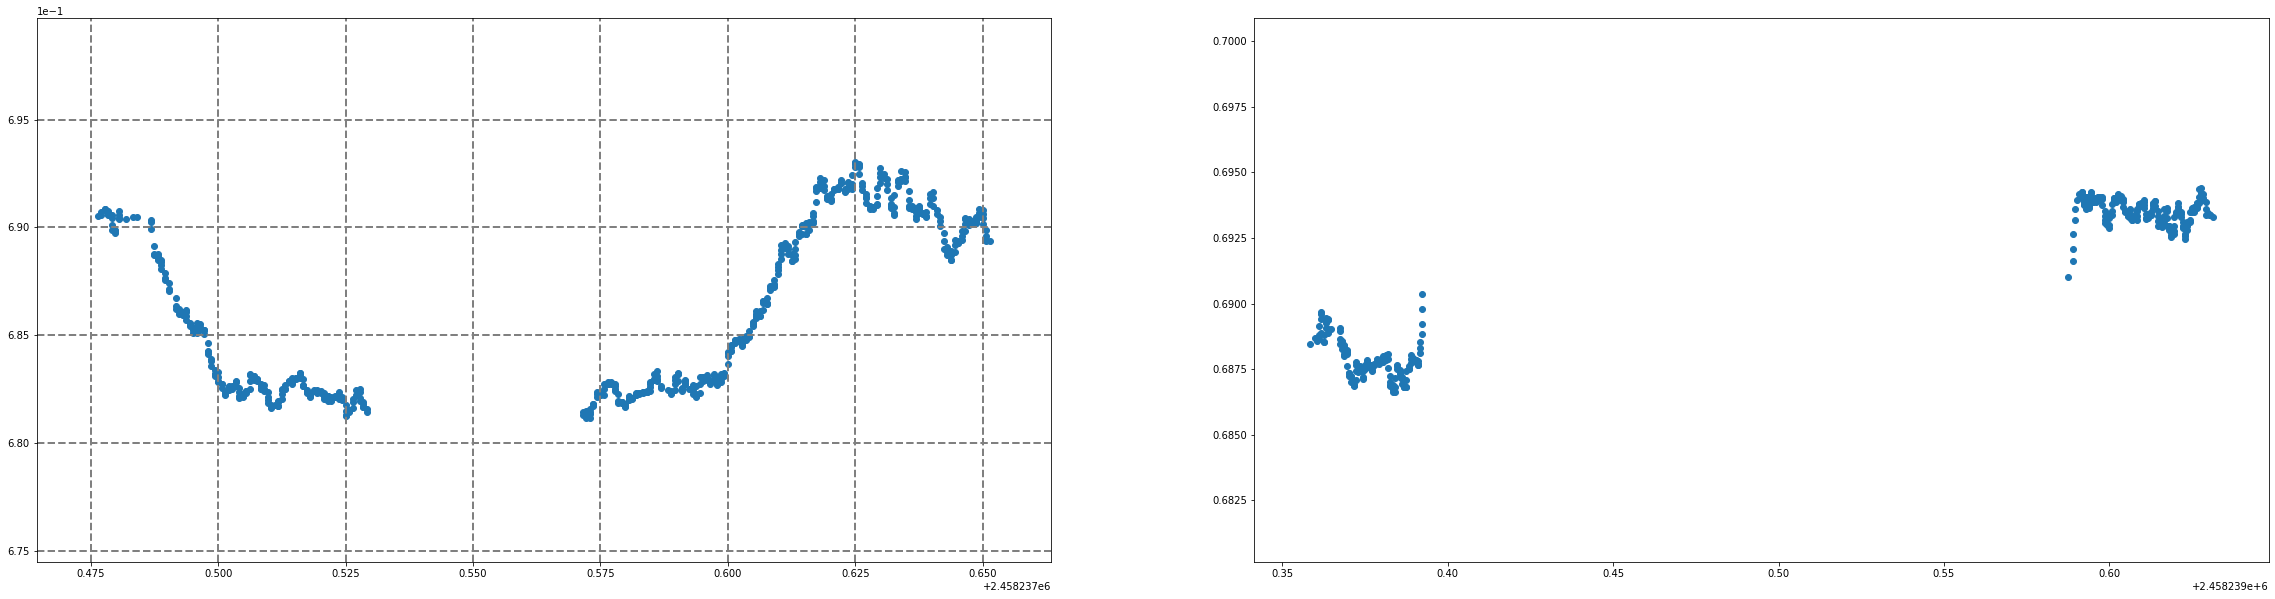

In [9]:
fig, axs=plt.subplots(1,2,figsize=(40,10))
axs[0].scatter(final1['MJD']+2400000.5,final1['smaclipped'])
axs[0].ticklabel_format(axis='y',style='sci',scilimits=(0,0))
axs[0].grid(color='gray', linestyle='--', linewidth=2)
#axs[0].set_ylim(1.7e6,1.9e6)
#axs[0].ticklabel_format(axis='x',useOffset=True,useLocale=True)
axs[1].scatter(final2['MJD']+2400000.5,final2['smaclipped'])
axs[1].ticklabel_format(axis='x',useOffset=True,useLocale=True)
plt.show()

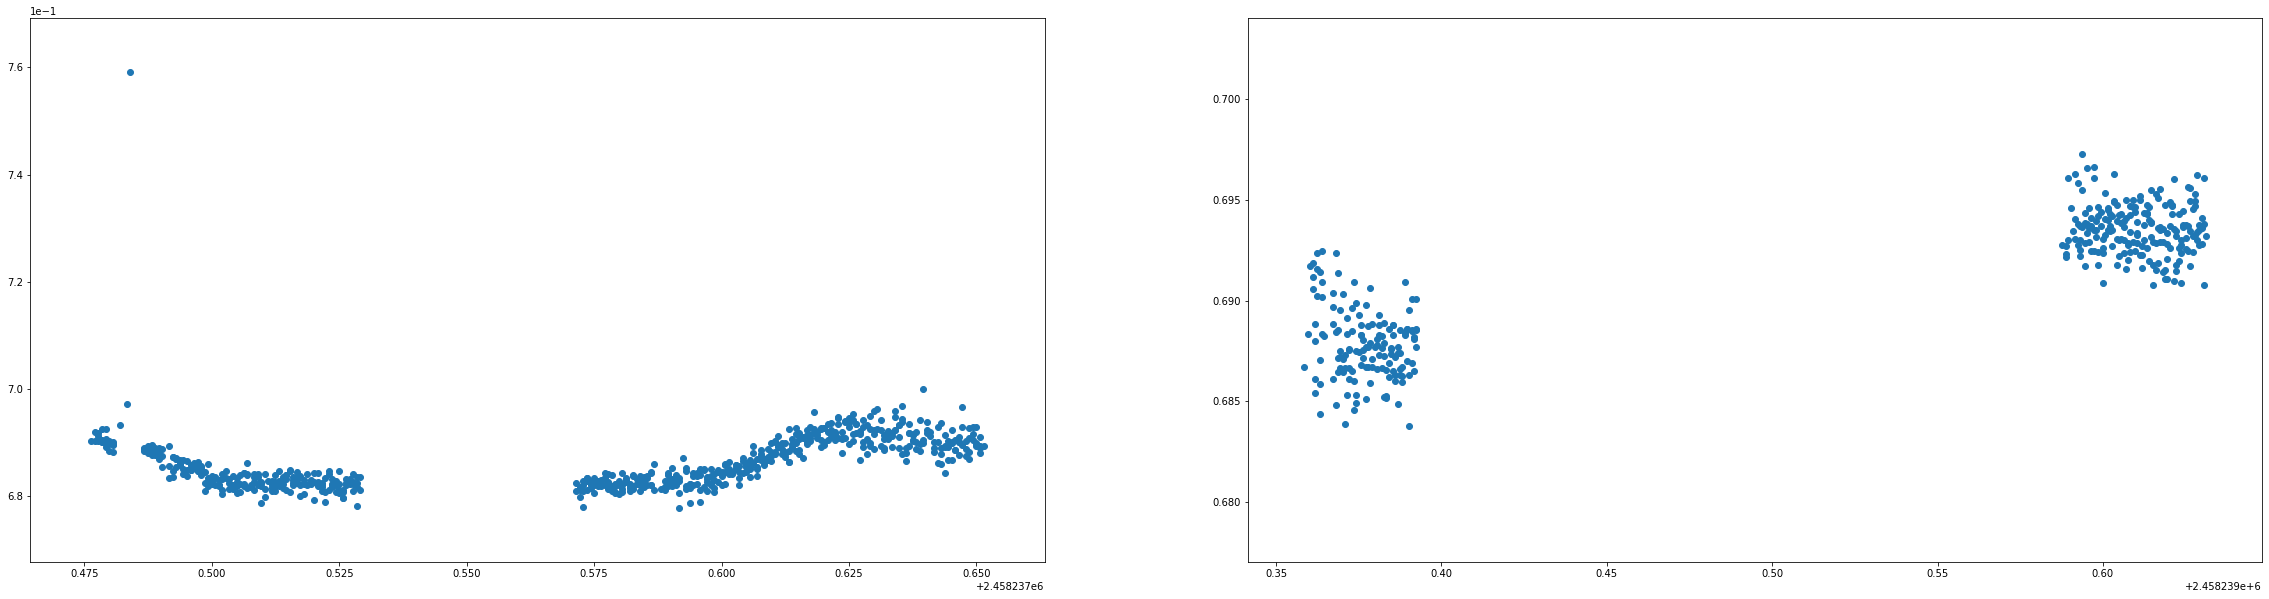

In [10]:
fig, axs=plt.subplots(1,2,figsize=(40,10))
axs[0].scatter(final1['MJD']+2400000.5,final1['relflux'])
axs[0].ticklabel_format(axis='y',style='sci',scilimits=(0,0))
#axs[0].set_ylim(1.7e6,1.9e6)
#axs[0].ticklabel_format(axis='x',useOffset=True,useLocale=True)
axs[1].scatter(final2['MJD']+2400000.5,final2['relflux'])
axs[1].ticklabel_format(axis='x',useOffset=True,useLocale=True)
plt.show()